In [9]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the path to your Excel file
file_path = r'C:\Users\Administrator\Documents\AQI DATA.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Now you can work with the data in the DataFrame 'df'
# For example, you can display the first 5 rows:
print(df.head())


             State      City  Annual average  year Particles
0  Andhra\nPradesh   Chitoor             9.0  2013       NO2
1  Andhra\nPradesh   Chitoor            10.0  2013       NO2
2  Andhra\nPradesh    Guntur            17.0  2013       NO2
3  Andhra\nPradesh  Hydrabad            19.0  2013       NO2
4  Andhra\nPradesh  Hydrabad            19.0  2013       NO2


In [10]:
# Get unique values for all columns
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}':")
    print(values)


Unique values in 'State':
['Andhra\nPradesh' 'Assam' 'Chandigarh' 'Chattisgarh'
 'Dadra &\nNagar Haveli' 'Daman &Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal\nPradesh' 'Jammu &\nKashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Madhya\nPradesh' 'Maharashtra' 'Meghalaya' 'Mizoram' 'Nagaland' 'Orissa'
 'Punjab' 'Puducherry' 'Rajasthan' 'Tamilnadu' 'Uttar\nPradesh'
 'Uttarakhand' 'West Bengal' 'Bihar' 'Telangana' 'Sikkim' 'Manipur'
 'Tripura' 'Lakshwade\nep' 'Pradesh' 'ArunachalPradesh']
Unique values in 'City':
['Chitoor' 'Guntur' 'Hydrabad' 'Kakinada' 'Anatapur' 'Kadapa' 'Karimnagar'
 'Khammam' 'Adilabad District' 'Nalgonda' 'nizamabad' 'Prakasam'
 'Rajahmundry' 'Gaddapotharam\nMedak District' 'Srikakulam' 'Vizianagaram'
 'Kurnool' 'Nellore' 'Eluru' 'Patencheru' 'Ramagundam' 'Tirupati'
 'Vijaywada' 'Warangal' 'Vishakhapatnam' 'Bongaigaon' 'Daranga'
 'Dibrugarh' 'Golaghat' 'Guwahati' 'Margherita' 'Lakhimpur' 'Nagaon'
 'Nalbari' 'Sibsagar' 'Silchar' 'Tezpur' 'Tinsukia' 'Chandigarh' 'Bhilla

In [41]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the path to your Excel file
file_path = r'C:\Users\Administrator\Documents\AQI DATA.xlsx'

# Read all sheets into a dictionary of DataFrames
all_dfs = pd.read_excel(file_path, sheet_name=None)

# Now, 'all_dfs' is a dictionary where keys are sheet names (or indices) and values are DataFrames

# You can loop through the dictionary to work with each DataFrame
for sheet_name, df in all_dfs.items():
    print(f"Data from sheet: {sheet_name}")
    print(df.head())  # Display the first 5 rows of each sheet's data
 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\182256106.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\182256106.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))


Top 10 States with the Highest SO2 Levels:
+---------------------+----------------+
|        State        | Annual average |
+---------------------+----------------+
|     Uttarakhand     |     20.93      |
|      Jharkhand      |     20.51      |
| Dadra &Nagar Haveli |      19.0      |
|     Maharashtra     |     15.48      |
|       Gujarat       |     14.39      |
|     Daman &Diu      |     13.28      |
|       Tripura       |      12.0      |
|       Haryana       |     11.89      |
|    MadhyaPradesh    |     11.16      |
|    UttarPradesh     |     10.86      |
+---------------------+----------------+

Bottom 10 States with the Lowest SO2 Levels:
+-----------------+----------------+
|      State      | Annual average |
+-----------------+----------------+
|    Telangana    |      5.94      |
|     Orissa      |      5.83      |
|      Delhi      |      5.64      |
|    Karnataka    |      5.44      |
|    Meghalaya    |      5.22      |
|   Chandigarh    |      4.69      |
|   

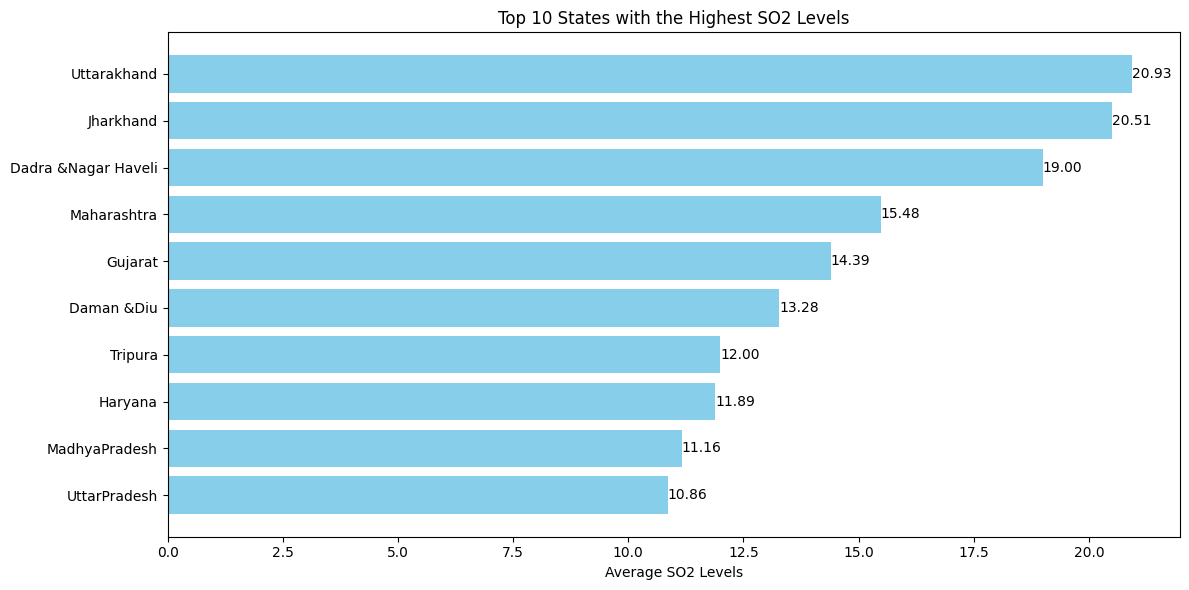

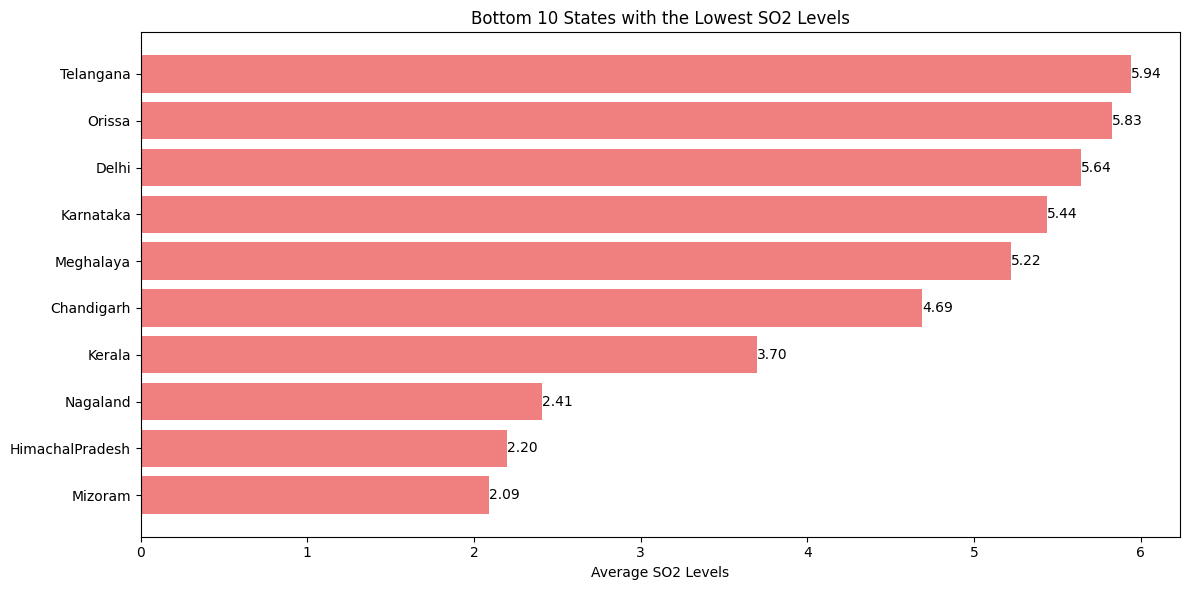

In [48]:
# Clean up state names (remove unwanted characters)
df['State'] = df['State'].str.replace('\n', '')

# Group the data by 'State' and calculate average SO2 levels
average_so2_by_state = df[df['Particles'] == 'SO2'].groupby('State')['Annual average'].mean().reset_index()

# Sort states by average SO2 levels
sorted_states = average_so2_by_state.sort_values(by='Annual average', ascending=False)

# Get the top 10 and bottom 10 states with the highest and lowest SO2 levels
top_10_states = sorted_states.head(10)
bottom_10_states = sorted_states.tail(10)



# Define the number of decimal places you want to display
decimal_places = 2

# Format the data in the DataFrames to the specified number of decimal places
top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))

# Convert the DataFrames to a table format
top_10_table = tabulate(top_10_states, headers='keys', tablefmt='pretty', showindex=False)
bottom_10_table = tabulate(bottom_10_states, headers='keys', tablefmt='pretty', showindex=False)

# Display the formatted tables
print("Top 10 States with the Highest SO2 Levels:")
print(top_10_table)

print("\nBottom 10 States with the Lowest SO2 Levels:")
print(bottom_10_table)


import matplotlib.pyplot as plt

# Assuming you have already calculated and formatted the top_10_states and bottom_10_states DataFrames for SO2 levels

# Plot the top 10 states with the highest SO2 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_states['State'], top_10_states['Annual average'], color='skyblue')
plt.xlabel('Average SO2 Levels')
plt.title('Top 10 States with the Highest SO2 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the highest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('top_10_so2_levels.png')  # Save the plot as an image
plt.show()  # Display the plot

# Plot the bottom 10 states with the lowest SO2 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_10_states['State'], bottom_10_states['Annual average'], color='lightcoral')
plt.xlabel('Average SO2 Levels')
plt.title('Bottom 10 States with the Lowest SO2 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the lowest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('bottom_10_so2_levels.png')  # Save the plot as an image
plt.show()  # Display the plot


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\2157573527.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\2157573527.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))


Top 10 States with the Highest NO2 Levels:
+--------------+----------------+
|    State     | Annual average |
+--------------+----------------+
|    Delhi     |     65.19      |
| West Bengal  |      39.9      |
|  Jharkhand   |     37.24      |
| Maharashtra  |     34.46      |
| Uttarakhand  |     32.65      |
| UttarPradesh |     30.22      |
|  Rajasthan   |     29.52      |
|    Bihar     |     28.42      |
|  Telangana   |     27.55      |
|   Haryana    |     25.95      |
+--------------+----------------+

Bottom 10 States with the Lowest NO2 Levels:
+-----------------+----------------+
|      State      | Annual average |
+-----------------+----------------+
|     Pradesh     |     14.62      |
|      Assam      |     14.23      |
|     Tripura     |     13.43      |
|     Kerala      |     13.03      |
| HimachalPradesh |     12.74      |
|       Goa       |     11.68      |
|    Meghalaya    |     10.96      |
|     Sikkim      |      7.24      |
|    Nagaland     |      6.3

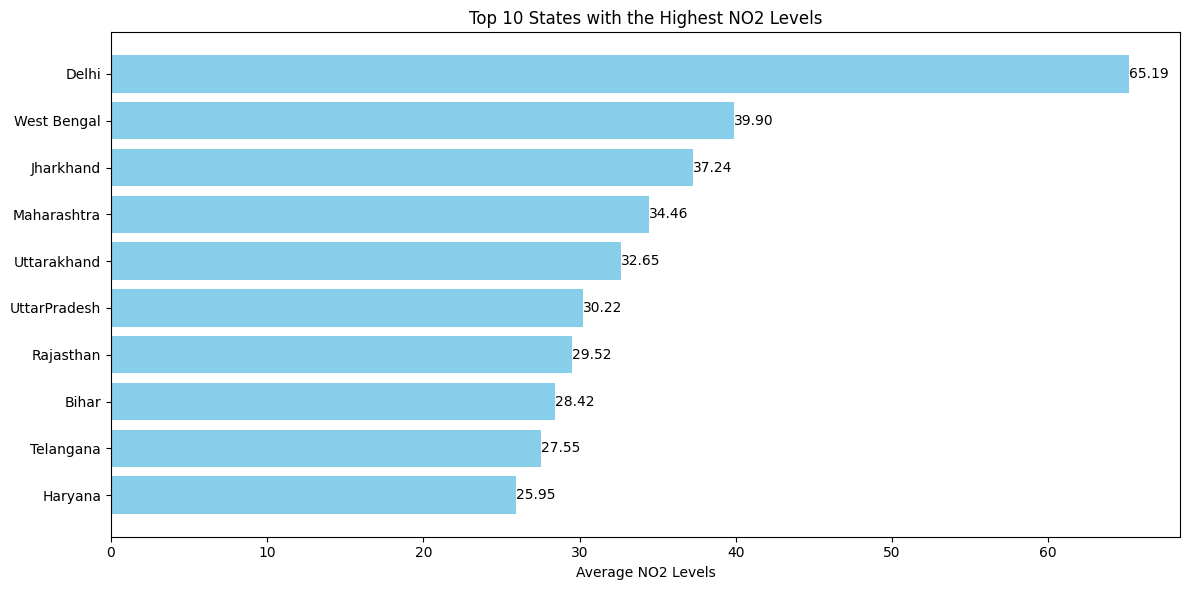

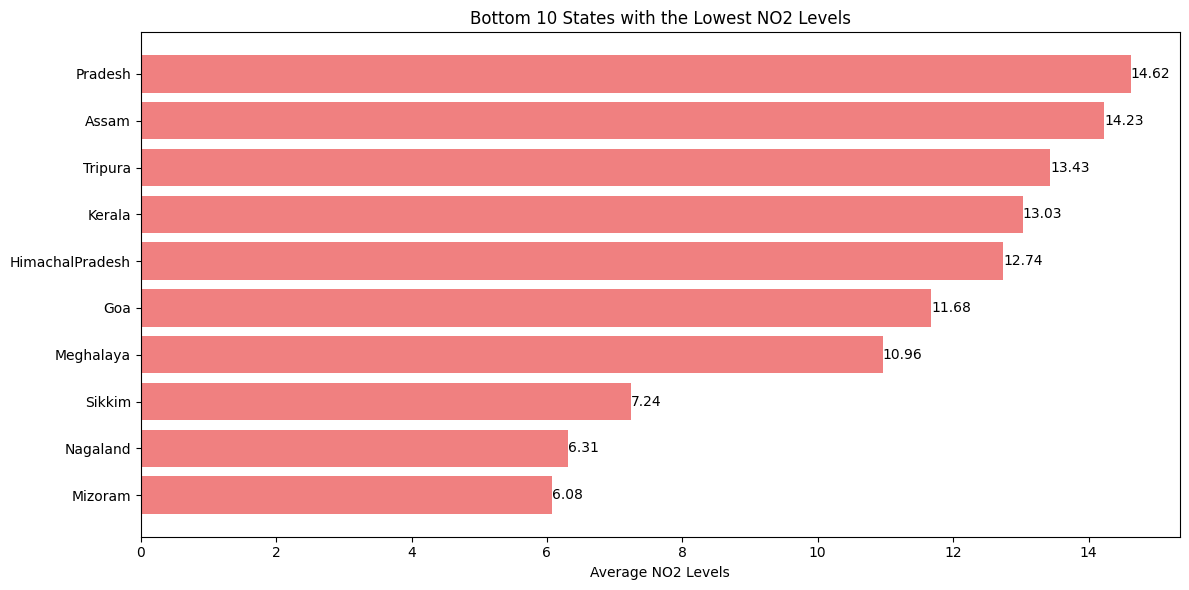

<Figure size 640x480 with 0 Axes>

In [50]:
# Clean up state names (remove unwanted characters)
df['State'] = df['State'].str.replace('\n', '')

# Group the data by 'State' and calculate average NO2 levels
average_no2_by_state = df[df['Particles'] == 'NO2'].groupby('State')['Annual average'].mean().reset_index()

# Sort states by average NO2 levels
sorted_states = average_no2_by_state.sort_values(by='Annual average', ascending=False)

# Get the top 10 and bottom 10 states with the highest and lowest NO2 levels
top_10_states = sorted_states.head(10)
bottom_10_states = sorted_states.tail(10)



from tabulate import tabulate

# Define the number of decimal places you want to display
decimal_places = 2

# Format the data in the DataFrames to the specified number of decimal places
top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))

# Convert the DataFrames to a table format
top_10_table = tabulate(top_10_states, headers='keys', tablefmt='pretty', showindex=False)
bottom_10_table = tabulate(bottom_10_states, headers='keys', tablefmt='pretty', showindex=False)

# Display the formatted tables
print("Top 10 States with the Highest NO2 Levels:")
print(top_10_table)

print("\nBottom 10 States with the Lowest NO2 Levels:")
print(bottom_10_table)


import matplotlib.pyplot as plt

# Assuming you have already calculated and formatted the top_10_states and bottom_10_states DataFrames for NO2 levels

# Plot the top 10 states with the highest NO2 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_states['State'], top_10_states['Annual average'], color='skyblue')
plt.xlabel('Average NO2 Levels')
plt.title('Top 10 States with the Highest NO2 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the highest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('top_10_no2_levels.png')  # Save the plot as an image
plt.show()  # Display the plot

# Plot the bottom 10 states with the lowest NO2 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_10_states['State'], bottom_10_states['Annual average'], color='lightcoral')
plt.xlabel('Average NO2 Levels')
plt.title('Bottom 10 States with the Lowest NO2 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the lowest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('bottom_10_no2_levels.png')  # Save the plot as an image
plt.show()  # Display the plot


# Save or display the plot
plt.savefig('bottom_10_so2_levels.png')  # Save the plot as an image
plt.show()  # Display the plot


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\3798167762.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\3798167762.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))


Top 10 States with the Highest PM10 Levels:
+----------------+----------------+
|     State      | Annual average |
+----------------+----------------+
|     Delhi      |     188.51     |
|  UttarPradesh  |     185.82     |
|   Jharkhand    |     168.98     |
|   Rajasthan    |     162.45     |
|  Uttarakhand   |     148.96     |
|    Haryana     |     145.06     |
|     Bihar      |     143.04     |
| Jammu &Kashmir |     142.55     |
|   Daman &Diu   |     142.04     |
|     Punjab     |     124.65     |
+----------------+----------------+

Bottom 10 States with the Lowest PM10 Levels:
+------------------+----------------+
|      State       | Annual average |
+------------------+----------------+
|    Karnataka     |      75.0      |
|  AndhraPradesh   |     68.69      |
|       Goa        |     67.01      |
|    Tamilnadu     |     66.28      |
| ArunachalPradesh |     63.17      |
|    Meghalaya     |     58.18      |
|      Kerala      |     54.59      |
|   Lakshwadeep    |     

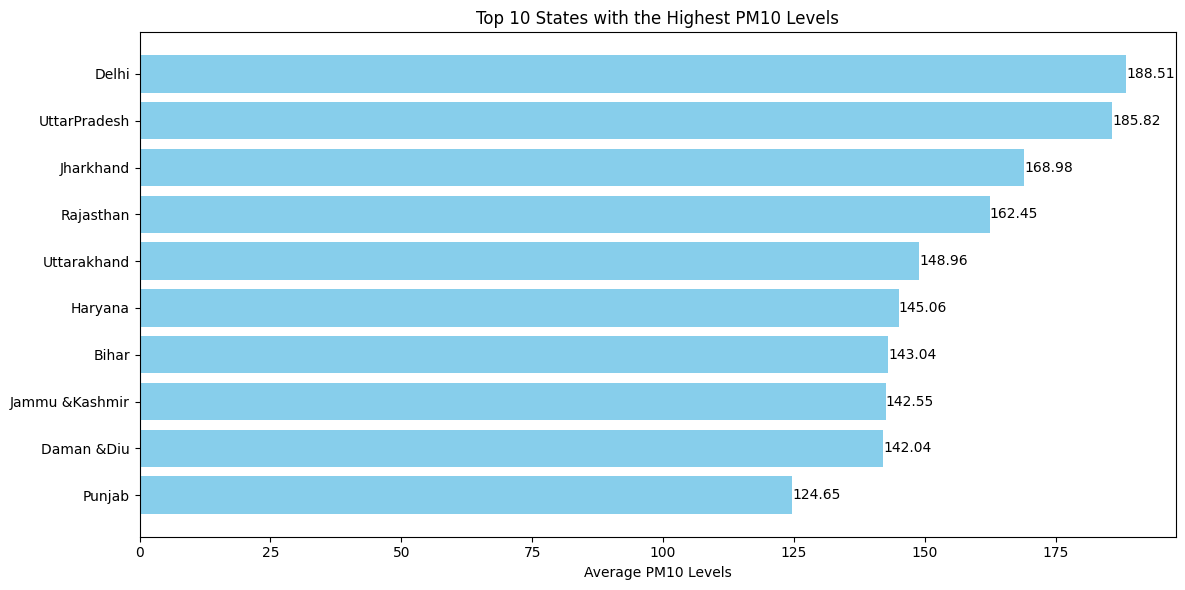

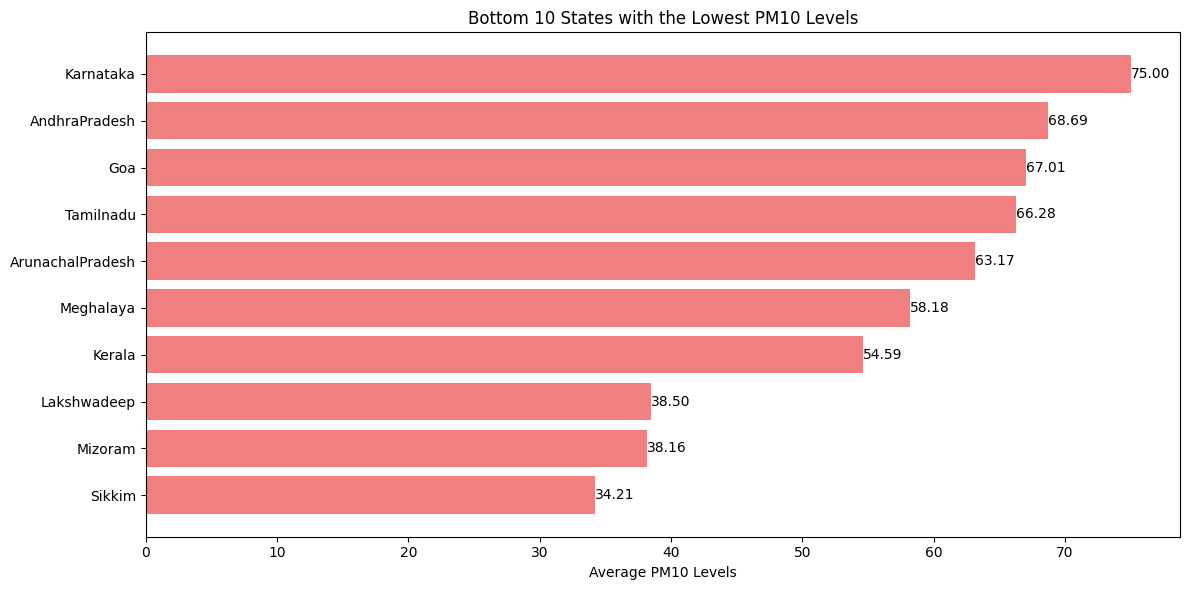

In [51]:
# Clean up state names (remove unwanted characters)
df['State'] = df['State'].str.replace('\n', '')

# Group the data by 'State' and calculate average PM10 levels
average_pm10_by_state = df[df['Particles'] == 'PM10'].groupby('State')['Annual average'].mean().reset_index()

# Sort states by average PM10 levels
sorted_states = average_pm10_by_state.sort_values(by='Annual average', ascending=False)

# Get the top 10 and bottom 10 states with the highest and lowest PM10 levels
top_10_states = sorted_states.head(10)
bottom_10_states = sorted_states.tail(10)


from tabulate import tabulate

# Define the number of decimal places you want to display
decimal_places = 2

# Format the data in the DataFrames to the specified number of decimal places
top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))

# Convert the DataFrames to a table format
top_10_table = tabulate(top_10_states, headers='keys', tablefmt='pretty', showindex=False)
bottom_10_table = tabulate(bottom_10_states, headers='keys', tablefmt='pretty', showindex=False)

# Display the formatted tables
print("Top 10 States with the Highest PM10 Levels:")
print(top_10_table)

print("\nBottom 10 States with the Lowest PM10 Levels:")
print(bottom_10_table)

import matplotlib.pyplot as plt

# Assuming you have already calculated and formatted the top_10_states and bottom_10_states DataFrames as mentioned in the previous code

# Plot the top 10 states with the highest PM10 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_states['State'], top_10_states['Annual average'], color='skyblue')
plt.xlabel('Average PM10 Levels')
plt.title('Top 10 States with the Highest PM10 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the highest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('top_10_pm10_levels.png')  # Save the plot as an image
plt.show()  # Display the plot

# Plot the bottom 10 states with the lowest PM10 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_10_states['State'], bottom_10_states['Annual average'], color='lightcoral')
plt.xlabel('Average PM10 Levels')
plt.title('Bottom 10 States with the Lowest PM10 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the lowest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('bottom_10_pm10_levels.png')  # Save the plot as an image
plt.show()  # Display the plot


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\3708692733.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17612\3708692733.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))


Top 10 States with the Highest PM2.5 Levels:
+--------------+----------------+
|    State     | Annual average |
+--------------+----------------+
|    Delhi     |     105.11     |
| UttarPradesh |     75.05      |
|   Haryana    |     71.04      |
|    Bihar     |      70.5      |
|  Chandigarh  |     67.35      |
| Uttarakhand  |     63.62      |
|   Manipur    |      58.5      |
|  Rajasthan   |      50.4      |
|   Tripura    |     46.29      |
|  Telangana   |     41.74      |
+--------------+----------------+

Bottom 10 States with the Lowest PM2.5 Levels:
+-------------+----------------+
|    State    | Annual average |
+-------------+----------------+
| Chattisgarh |     25.91      |
| Maharashtra |     24.61      |
|  Meghalaya  |     23.09      |
|    Assam    |     18.13      |
|  Nagaland   |      16.5      |
|  Jharkhand  |     13.12      |
|   Punjab    |     13.06      |
|   Mizoram   |      11.7      |
| Puducherry  |      10.0      |
|   Sikkim    |      3.88      |
+-

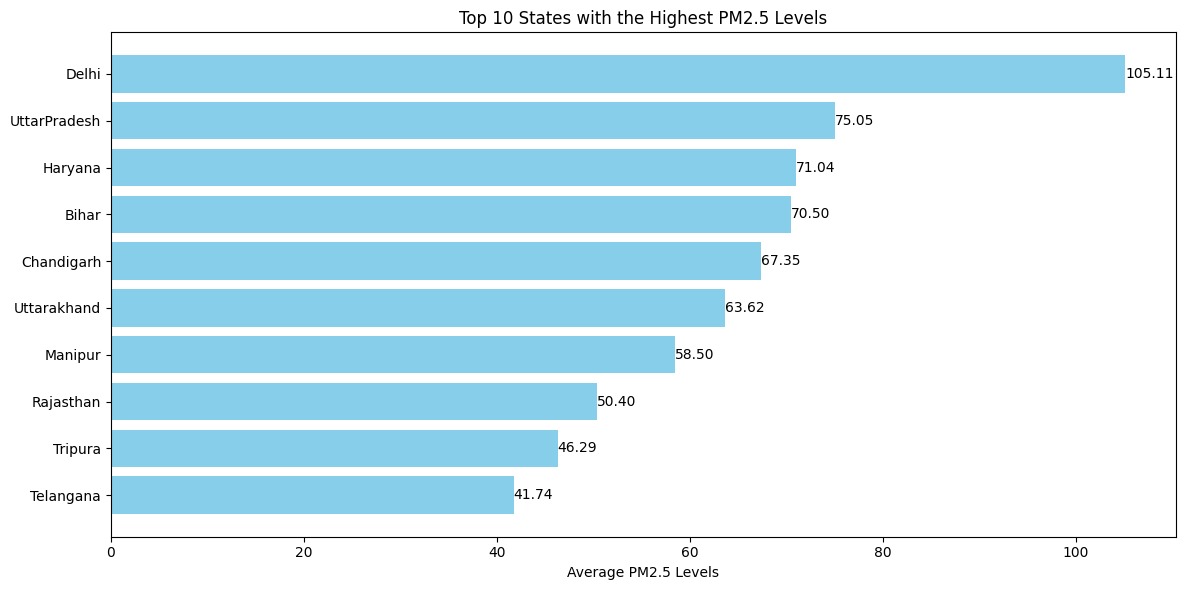

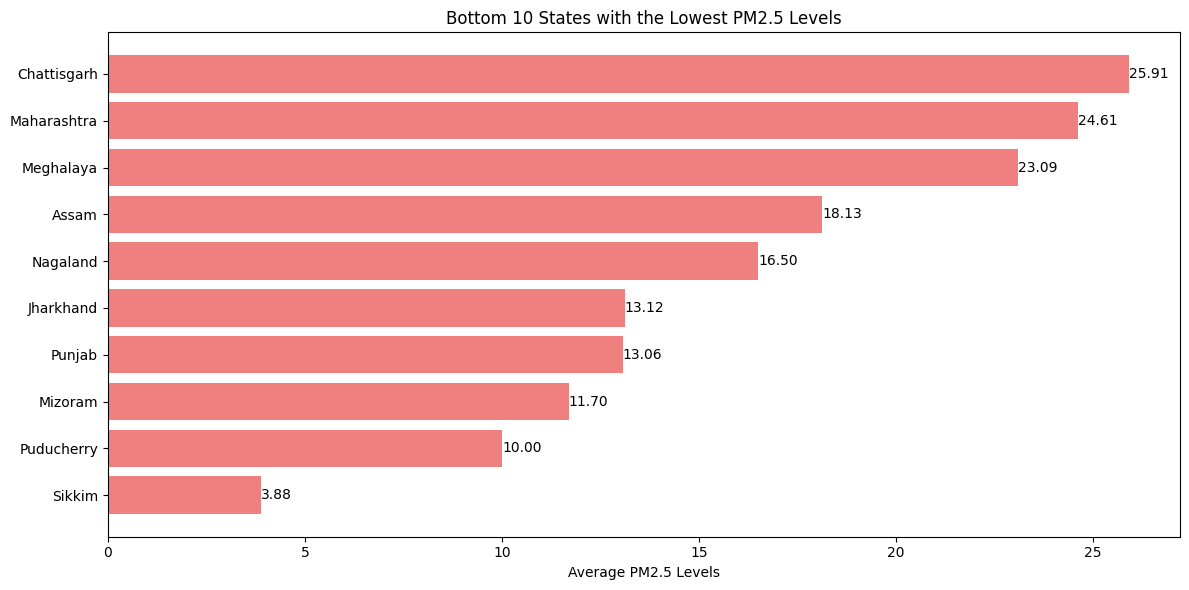

In [56]:


# Group the data by 'State' and calculate average PM2.5 levels
average_pm25_by_state = df[df['Particles'] == 'PM2.5'].groupby('State')['Annual average'].mean().reset_index()

# Sort states by average PM2.5 levels
sorted_states = average_pm25_by_state.sort_values(by='Annual average', ascending=False)

# Get the top 10 and bottom 10 states with the highest and lowest PM2.5 levels
top_10_states = sorted_states.head(10)
bottom_10_states = sorted_states.tail(10)

from tabulate import tabulate

# Define the number of decimal places you want to display
decimal_places = 2

# Format the data in the DataFrames to the specified number of decimal places
top_10_states['Annual average'] = top_10_states['Annual average'].apply(lambda x: round(x, decimal_places))
bottom_10_states['Annual average'] = bottom_10_states['Annual average'].apply(lambda x: round(x, decimal_places))

# Convert the DataFrames to a table format
top_10_table = tabulate(top_10_states, headers='keys', tablefmt='pretty', showindex=False)
bottom_10_table = tabulate(bottom_10_states, headers='keys', tablefmt='pretty', showindex=False)

# Display the formatted tables
print("Top 10 States with the Highest PM2.5 Levels:")
print(top_10_table)

print("\nBottom 10 States with the Lowest PM2.5 Levels:")
print(bottom_10_table)



import matplotlib.pyplot as plt

# Assuming you have already calculated and formatted the top_10_states and bottom_10_states DataFrames as mentioned in the previous code

# Plot the top 10 states with the highest PM2.5 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_states['State'], top_10_states['Annual average'], color='skyblue')
plt.xlabel('Average PM2.5 Levels')
plt.title('Top 10 States with the Highest PM2.5 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the highest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('top_10_pm2.5_levels.png')  # Save the plot as an image
plt.show()  # Display the plot

# Plot the bottom 10 states with the lowest PM2.5 levels
plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_10_states['State'], bottom_10_states['Annual average'], color='lightcoral')
plt.xlabel('Average PM2.5 Levels')
plt.title('Bottom 10 States with the Lowest PM2.5 Levels')
plt.gca().invert_yaxis()  # Reverse the order to have the lowest at the top

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()

# Save or display the plot
plt.savefig('bottom_10_pm2.5_levels.png')  # Save the plot as an image
plt.show()  # Display the plot


In [59]:
# Calculate and define the top states DataFrame for SO2
top_so2 = df[df['Particles'] == 'SO2'].groupby('State')['Annual average'].mean().reset_index()
top_so2 = top_so2.sort_values(by='Annual average', ascending=False).head(10)


top_no2 = df[df['Particles'] == 'NO2'].groupby('State')['Annual average'].mean().reset_index()
top_no2 = top_no2.sort_values(by='Annual average', ascending=False).head(10)

top_pm10 = df[df['Particles'] == 'PM10'].groupby('State')['Annual average'].mean().reset_index()
top_pm10 = top_pm10.sort_values(by='Annual average', ascending=False).head(10)

top_pm25 = df[df['Particles'] == 'PM2.5'].groupby('State')['Annual average'].mean().reset_index()
top_pm25 = top_pm25.sort_values(by='Annual average', ascending=False).head(10)



Top 10 States with the Highest Pollutant Levels:
+---------------------+-------+-------+--------+--------+
|        State        |  SO2  |  NO2  |  PM10  | PM2.5  |
+---------------------+-------+-------+--------+--------+
|     Uttarakhand     | 20.93 | 65.19 | 188.51 | 105.11 |
|      Jharkhand      | 20.51 | 39.9  | 185.82 | 75.05  |
| Dadra &Nagar Haveli | 19.0  | 37.24 | 168.98 | 71.04  |
|     Maharashtra     | 15.48 | 34.46 | 162.45 |  70.5  |
|       Gujarat       | 14.39 | 32.65 | 148.96 | 67.35  |
|     Daman &Diu      | 13.28 | 30.22 | 145.06 | 63.62  |
|       Tripura       | 12.0  | 29.52 | 143.04 |  58.5  |
|       Haryana       | 11.89 | 28.42 | 142.55 |  50.4  |
|    MadhyaPradesh    | 11.16 | 27.55 | 142.04 | 46.29  |
|    UttarPradesh     | 10.86 | 25.95 | 124.65 | 41.74  |
+---------------------+-------+-------+--------+--------+


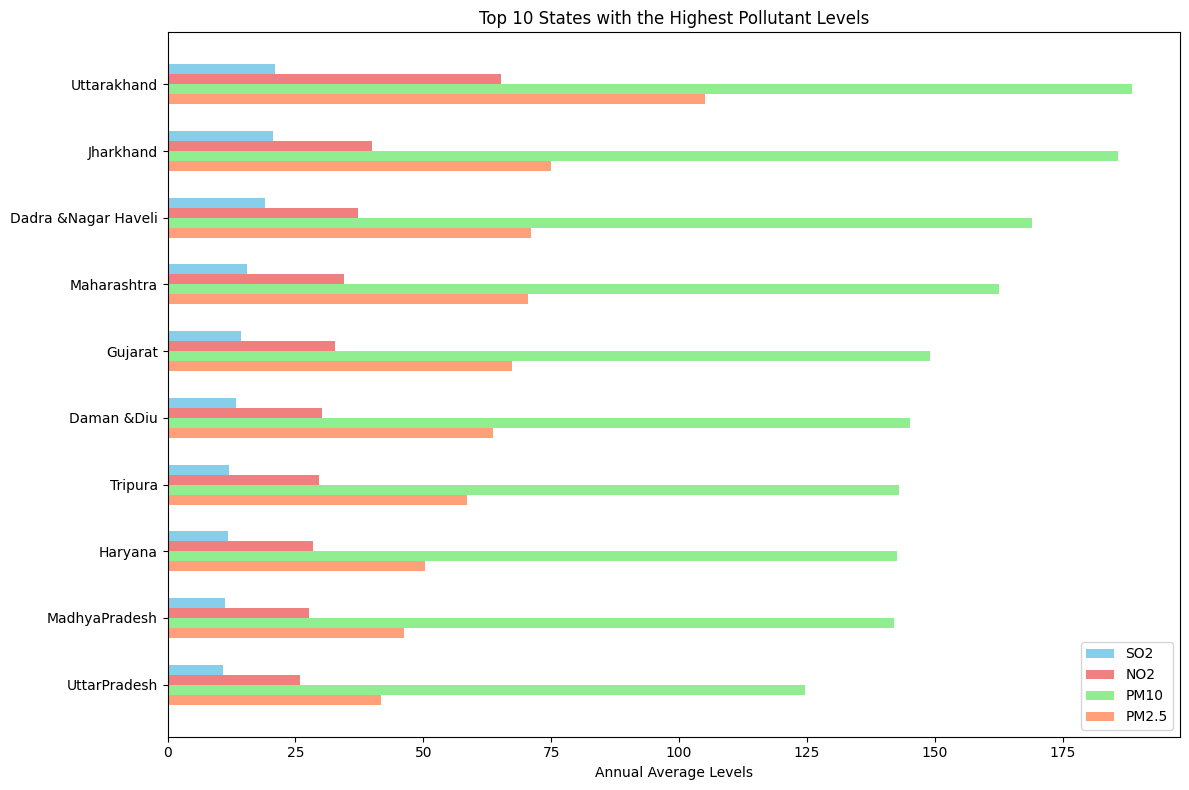

In [64]:


# Create a table with the top 10 states for each pollutant
top_states_table = tabulate({
    'State': top_so2['State'],
    'SO2': top_so2['Annual average'].apply(lambda x: round(x, 2)),
    'NO2': top_no2['Annual average'].apply(lambda x: round(x, 2)),
    'PM10': top_pm10['Annual average'].apply(lambda x: round(x, 2)),
    'PM2.5': top_pm25['Annual average'].apply(lambda x: round(x, 2))
}, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print("Top 10 States with the Highest Pollutant Levels:")
print(top_states_table)






import matplotlib.pyplot as plt

# Assuming you've calculated and defined the top states DataFrames for each pollutant as shown in your code

# Create a combined bar chart for the top states with the highest levels of SO2, NO2, PM10, and PM2.5
plt.figure(figsize=(12, 8))
bar_width = 0.15
index = range(10)

# Plot bars for SO2
plt.barh(index, top_so2['Annual average'], bar_width, label='SO2', color='skyblue')

# Plot bars for NO2
plt.barh([i + bar_width for i in index], top_no2['Annual average'], bar_width, label='NO2', color='lightcoral')

# Plot bars for PM10
plt.barh([i + 2 * bar_width for i in index], top_pm10['Annual average'], bar_width, label='PM10', color='lightgreen')

# Plot bars for PM2.5
plt.barh([i + 3 * bar_width for i in index], top_pm25['Annual average'], bar_width, label='PM2.5', color='lightsalmon')

# Set y-axis labels with state names
plt.yticks([i + 1.5 * bar_width for i in index], top_so2['State'])

plt.xlabel('Annual Average Levels')
plt.title('Top 10 States with the Highest Pollutant Levels')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()

# Save or display the plot
plt.savefig('top_10_pollutant_levels.png')  # Save the plot as an image
plt.show()  # Display the plot


In [67]:
# Calculate and define the bottom states DataFrame for SO2
bottom_so2 = df[df['Particles'] == 'SO2'].groupby('State')['Annual average'].mean().reset_index()
bottom_so2 = bottom_so2.sort_values(by='Annual average').head(10)

# Calculate and define the bottom states DataFrame for NO2
bottom_no2 = df[df['Particles'] == 'NO2'].groupby('State')['Annual average'].mean().reset_index()
bottom_no2 = bottom_no2.sort_values(by='Annual average').head(10)

# Calculate and define the bottom states DataFrame for PM10
bottom_pm10 = df[df['Particles'] == 'PM10'].groupby('State')['Annual average'].mean().reset_index()
bottom_pm10 = bottom_pm10.sort_values(by='Annual average').head(10)

# Calculate and define the bottom states DataFrame for PM2.5
bottom_pm25 = df[df['Particles'] == 'PM2.5'].groupby('State')['Annual average'].mean().reset_index()
bottom_pm25 = bottom_pm25.sort_values(by='Annual average').head(10)


Bottom 10 States with the Lowest Pollutant Levels:
+-----------------+------+-------+-------+-------+
|      State      | SO2  |  NO2  | PM10  | PM2.5 |
+-----------------+------+-------+-------+-------+
|     Mizoram     | 2.09 | 6.08  | 34.21 | 3.88  |
| HimachalPradesh | 2.2  | 6.31  | 38.16 | 10.0  |
|    Nagaland     | 2.41 | 7.24  | 38.5  | 11.7  |
|     Kerala      | 3.7  | 10.96 | 54.59 | 13.06 |
|   Chandigarh    | 4.69 | 11.68 | 58.18 | 13.12 |
|    Meghalaya    | 5.22 | 12.74 | 63.17 | 16.5  |
|    Karnataka    | 5.44 | 13.03 | 66.28 | 18.13 |
|      Delhi      | 5.64 | 13.43 | 67.01 | 23.09 |
|     Orissa      | 5.83 | 14.23 | 68.69 | 24.61 |
|    Telangana    | 5.94 | 14.62 | 75.0  | 25.91 |
+-----------------+------+-------+-------+-------+


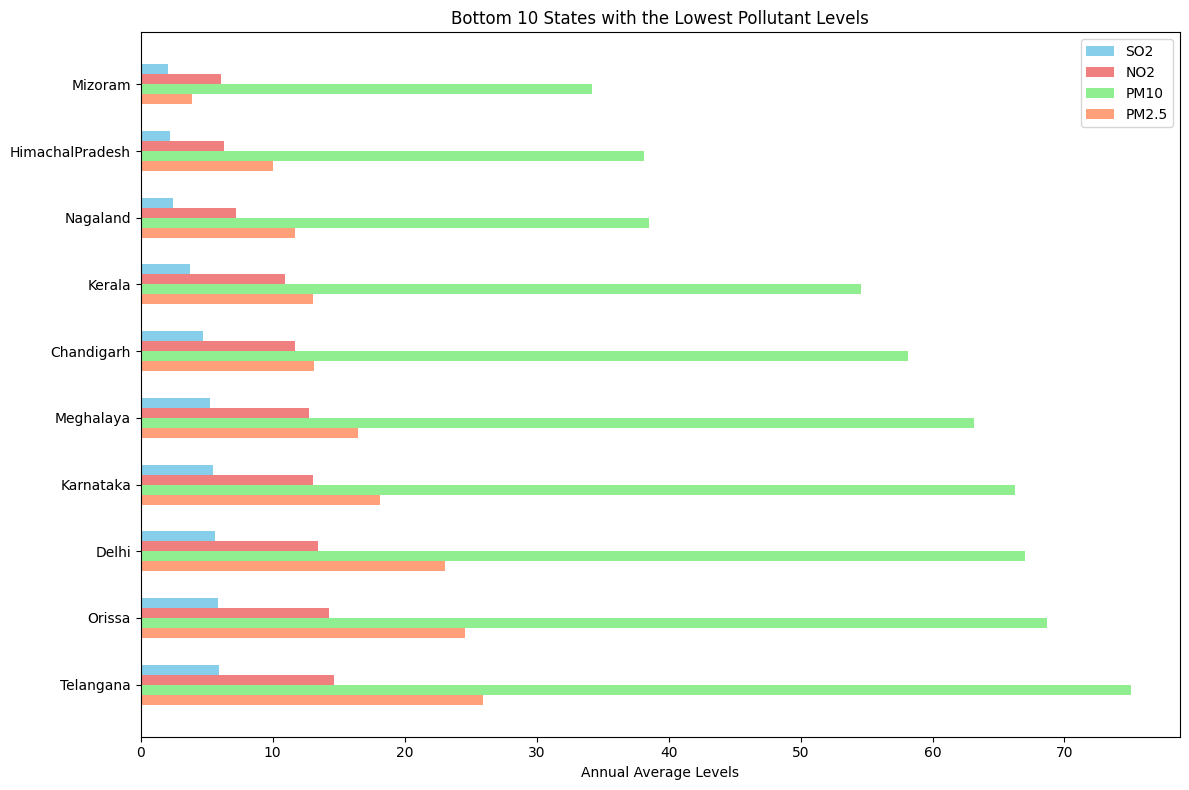

In [69]:
# Create a table with the bottom 10 states for each pollutant
bottom_states_table = tabulate({
    'State': bottom_so2['State'],
    'SO2': bottom_so2['Annual average'].apply(lambda x: round(x, 2)),
    'NO2': bottom_no2['Annual average'].apply(lambda x: round(x, 2)),
    'PM10': bottom_pm10['Annual average'].apply(lambda x: round(x, 2)),
    'PM2.5': bottom_pm25['Annual average'].apply(lambda x: round(x, 2))
}, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print("Bottom 10 States with the Lowest Pollutant Levels:")
print(bottom_states_table)

# Create a combined bar chart for the bottom states with the lowest levels of SO2, NO2, PM10, and PM2.5
plt.figure(figsize=(12, 8))

# Plot bars for SO2
plt.barh(index, bottom_so2['Annual average'], bar_width, label='SO2', color='skyblue')

# Plot bars for NO2
plt.barh([i + bar_width for i in index], bottom_no2['Annual average'], bar_width, label='NO2', color='lightcoral')

# Plot bars for PM10
plt.barh([i + 2 * bar_width for i in index], bottom_pm10['Annual average'], bar_width, label='PM10', color='lightgreen')

# Plot bars for PM2.5
plt.barh([i + 3 * bar_width for i in index], bottom_pm25['Annual average'], bar_width, label='PM2.5', color='lightsalmon')

# Set y-axis labels with state names
plt.yticks([i + 1.5 * bar_width for i in index], bottom_so2['State'])

plt.xlabel('Annual Average Levels')
plt.title('Bottom 10 States with the Lowest Pollutant Levels')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()

# Save or display the plot
plt.savefig('bottom_10_pollutant_levels.png')  # Save the plot as an image
plt.show()  # Display the plot
